# Applied Machine Learning: Unsupervised Learning

## Preamble and Datasets

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  del sys.path[0]


Unsupervised machine learning involves a wide variety of tasks where unlike supervised learning there's __no target__ value to be predicted. 

Instead, the job of the unsupervised learning algorithm is to take the raw data and <font color='red'> capture some interesting structure in it.</font>
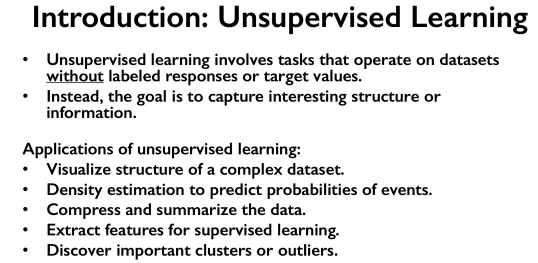

This is useful for a number of scenarios:
- to explore and visualize the structure in a complex dataset, 
- to do density estimation,
- to predict the probabilities of events. 
- To compress the data,
- to extract more effective features before applying a supervised learning algorithm. 
- Or to discover important structures like clusters of similar objects or unusual or individual outliers in the data. 

All of these and other unsupervised learning tasks have in common the property that there are _no_ target values, labels or output to learn from or to be predicted. Instead, we __only have the unlabeled samples__ in the dataset as input. 

Here's an example of an unsupervised method called clustering. 
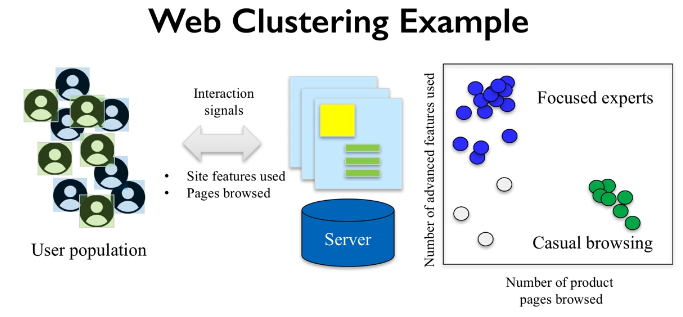

Suppose you're in charge of running a website that allows people to buy products from your company and the site gets thousands of visits per day. As people access the site by clicking links to products or typing in search terms, their interactions are logged by the web server that creates a large log file. It might be useful for your business to understand who's using your site by grouping users according to their shopping behavior.
> For example, there might be a group of more expert users who use more advanced features to find something very specific. While another group of non-expert users might just enjoy browsing a broader set of items. 

By clustering users into groups, you might
- gain some insight into who your typical customers are and 
- what site features different types of users find important. 

You could use insights from clustering users to improve the site's features for different groups or to recommend products to specific groups that would be more likely to buy them. 

So in this lecture, we'll give a brief survey of unsupervised learning methods divided into two major categories. 
1. First we'll look at one family of unsupervised methods called __transformations__, because they essentially just run the original data through some kind of _useful process_ that extracts or computes information of some kind. 
2. Then we'll look at the other broad family of unsupervised learning methods which are the __clustering__ methods, like in our website example that find groups in the data and assign every point in the dataset to one of the groups. 

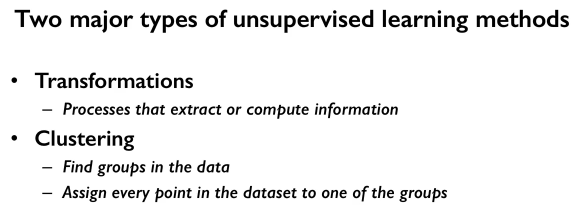

## Transformation: density estimation

Okay, let's look at some important unsupervised learning methods that __transform__ the input data in useful ways. 

One method called __density estimation__ is used when you have
- a set of measurements scattered throughout an area, and 
- you want to create what you can think of as a smooth version over the whole area that gives a general estimate for how likely it would be to observe a particular measurement in some area of that space. 

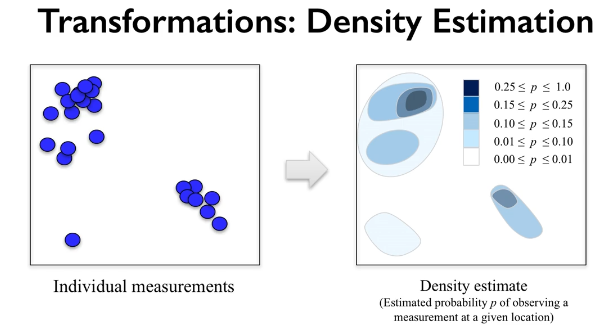


For example, in a medical application related to diagnosing diabetes, density estimation with one variable might be used to estimate the distribution of a specific test score: the plasma glucose concentration number from a blood test for people who have a particular form of diabetes. 

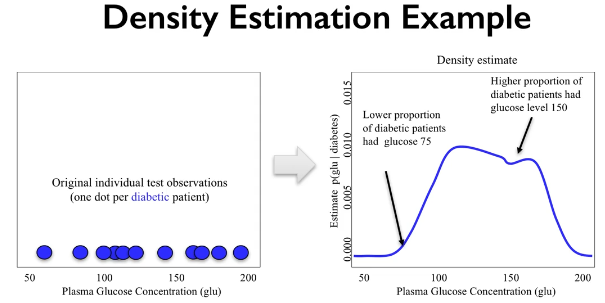

With this density estimate we can estimate the probability that anyone with that medical condition has a particular glucose score, _even_ if that specific score wasn't seen in the original dataset.

We could then compare this to the range of glucose levels for people who _do not_ have that condition, which is shown by the red line here.
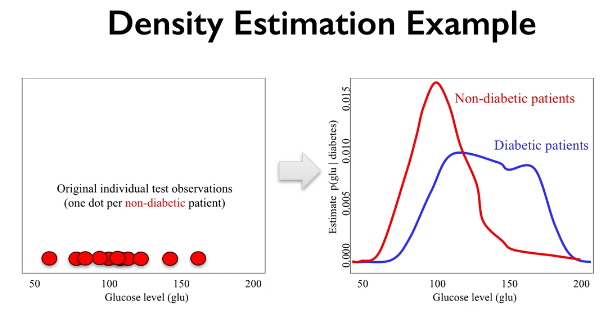

Often, density estimates are then used in _further_ machine learning stages as part of providing features for classification or regression. 

The more technical way to say this is that density estimation calculates __a continuous probability density over the feature space__, given a set of discrete samples in that feature space.

With this density estimate, we can estimate how likely _any given combination of features_ is to occur. 

In Scikit-Learn, you can use the __kernel density class__ in the sklearn.neighbors module to perform one widely used form of density estimation called __kernel density estimation__. Kernel density's especially popular for use in creating heat maps with geospatial data like this one.

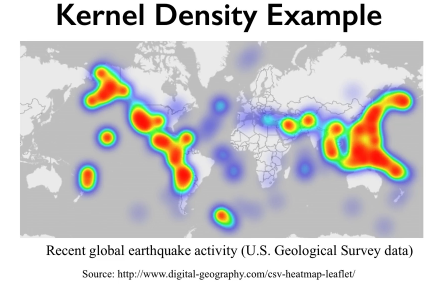

## Transformation: dimensionality reduction and manifold learning

Another very important family of unsupervised learning methods that fall into the __transformation__ category are known as dimensionality reduction algorithms.

As the name suggests, this kind of transform takes your original dataset that might contain say, 200 features and finds an approximate version of dataset that uses, say, only 10 dimensions. 

One very common need for dimensionality reduction arises when first _exploring_ a dataset, to understand how the samples may be grouped or related to each other by visualizing it using a two-dimensional scatterplot. 

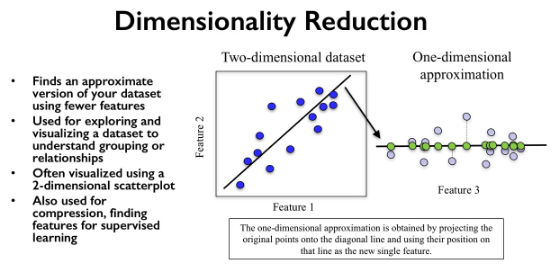

### Principal Components Analysis (PCA)

One very important form of dimensionality reduction is called __principal component analysis, or PCA__. 

Intuitively, what PCA does is
- take your cloud of original data points and
- finds a _rotation_ of it so the dimensions are <font color=red> _statistically uncorrelated_</font>. 
- PCA then typically drops all but the most informative initial dimensions that capture most of the variation in the original dataset. 

Here's a simple example of what I mean with a synthetic two-dimensional dataset. 

Here, if we have two original features that are _highly correlated_ represented by this cloud of points, PCA will 
- rotate the data so the direction of highest variance - called the first principal component, which is along the long direction of the cloud - becomes the first dimension. 
- It will then find the direction at _right angles_ that maximally captures the remaining variance. This is the second principle component. 
    - In two dimensions, there's only one possible such direction at right angles of the first principal component, but for higher dimensions, there would be __infinitely__ many. 
    - With _more_ than two dimensions, the process of finding successive principal components at right angles to the previous ones would continue until the desired number of principal components is reached. 

One result of applying PCA is that we now know the _best_ one-dimensional approximation to the original two-dimensional data. 

In other words, we can take _any_ data point that used two features before - x and y - and <font color='red'> approximate it using just _one_ feature </font>, namely its location when projected onto the first principal component. 

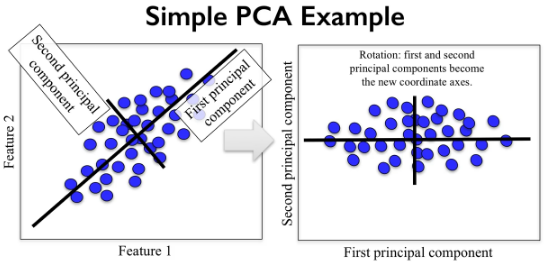

#### Using PCA to find the first two principal components of the breast cancer dataset

Here's an example of using scikit learn to apply PCA to a higher dimensional dataset; the breast cancer dataset.

To perform PCA, we
- import the PCA class from __sklearn.decomposition.__ 
- It's important to first __transform__ the dataset so that each features range of values has zero mean and unit variance. And we can do this using the
    - fit and
    - transform methods of the standard scalar class, as shown here.
- We then create the PCA object, specify that we want 
    - to retain just the first two principal components to reduce the dimensionality to just two columns and 
    - call the fit method using our _normalized_ data.
    
This will set up PCA so that it learns the right rotation of the dataset. We can then apply this properly prepared PCA object to project all the points in our original input dataset to this new two-dimensional space. 

> Notice here since we're _not_ doing supervised learning in evaluating a model against a test set, we _don't_ have to split our dataset into training and test sets. 

You see that if we take the shape of the array that's returned from PCA, it's transformed our original dataset with 30 features into a new array that has just two columns, essentially expressing each original data point in terms of two new features representing the position of the data point in this new two-dimensional PCA space. 

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print('\n Original dataset shape: ', X_cancer.shape, '\nTransformed dataset: ', X_pca.shape)


 Original dataset shape:  (569, 30) 
Transformed dataset:  (569, 2)


In [5]:
X_cancer

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
y_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### Plotting the PCA-transformed version of the breast cancer dataset

We can then create a scatterplot that uses these two new features to see how the data forms clusters. 

In this example, we've used the dataset that has labels for supervised learning; namely, the malignant and benign labels on cancer cells, so we can see how well PCA serves to find clusters in the data. 

Here's the result of plotting all the 30 feature data samples using the two new features computed with PCA. 

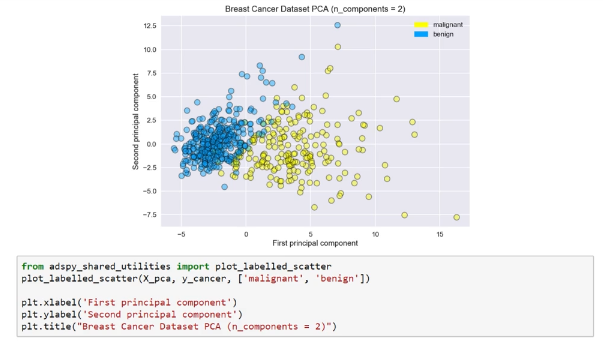

We can see that the malignant and benign cells do indeed tend to cluster into two groups in the space. 

In fact, we could now apply a __linear classifier__ to this two-dimensional representation of the original dataset and we can see that it would likely do fairly well. 

This illustrates __another use__ of dimensionality reduction methods like PCA: <font color=red> to find informative features that could then be used in a later supervised learning stage.</font>


In [4]:
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

<IPython.core.display.Javascript object>

#### Plotting the magnitude of each feature value for the first two principal components

We can create a heat map that visualizes the first two principal components of the breast cancer dataset to get an idea of what feature groupings each component is associated with.

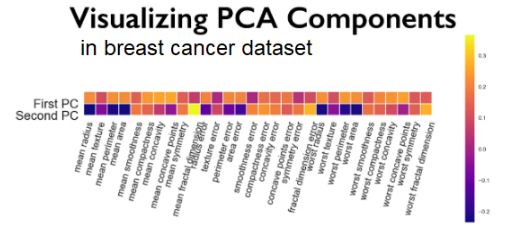

Note that we can get the arrays representing the two principal component axes that define the PCA space using the PCA.components_attribute that's filled in after the PCA fit method is used on the data. 

- We can see that the __first__ principle component is all positive, showing a general correlation between _all_ 30 features.
    - In other words, they tend to vary _up and down together_.
- The __second__ principle component has a _mixture_ of positive and negative signs; 
    - but in particular, we can see a cluster of negatively signed features that co-vary together and in the _opposite_ direction of the remaining features. 
    - Looking at the names, it makes sense the subset wold co-vary together. We see the pair _mean texture_ and _worst texture_ and the pair _mean radius_ and _worst radius_ varying together and so on. 
    
PCA gives a good _initial_ tool for exploring a dataset, but may _not_ be able to find more subtle groupings that produce better visualizations for more complex datasets. 

<IPython.core.display.Javascript object>


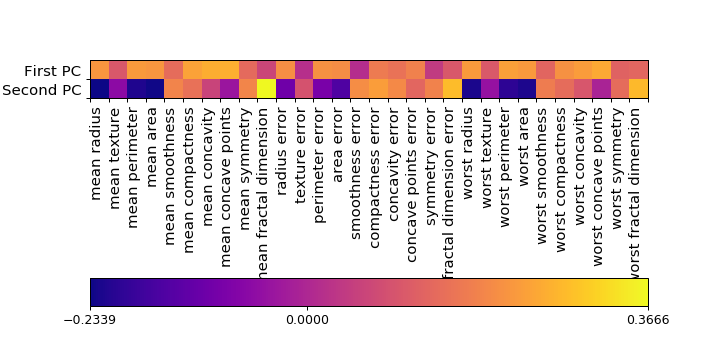

In [8]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### PCA on the fruit dataset (for comparison)

<IPython.core.display.Javascript object>


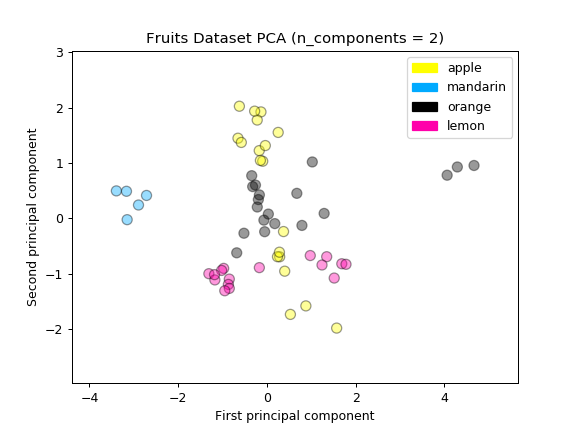

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits.values.flatten(), ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### Manifold learning methods

There is a family of unsupervised algorithms called _Manifold Learning Algorithms_ that are very good at finding <font color='red'>low dimensional structure in high dimensional data</font> and are very useful for _visualizations_. 

One _classic_ example of a low dimensional subset in a high dimensional space is this data set in three dimensions, where the points all lie on a two-dimensional sheet with an interesting shape. 
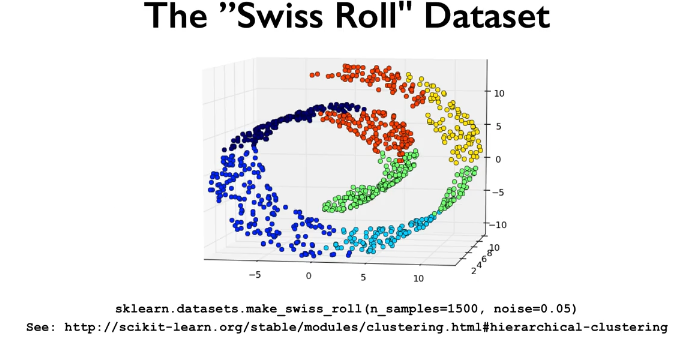

This _lower dimensional sheet_ within a _higher dimensional space_ is called the __manifold__. 

> PCA is _not_ sophisticated enough to find this interesting structure. 

#### Multidimensional scaling
One widely used manifold learning method is called __multi-dimensional scaling__, or MDS. 

There are many flavors of MDS, but they all have the same general goal: to visualize a high dimensional dataset and project it onto a lower dimensional space - in most cases, a two-dimensional page - in a way that  <font color=red> preserves information about how the points in the original data space are __close__ to each other.</font>

> In this way, you can find and visualize clustering behavior in your high dimensional data. 

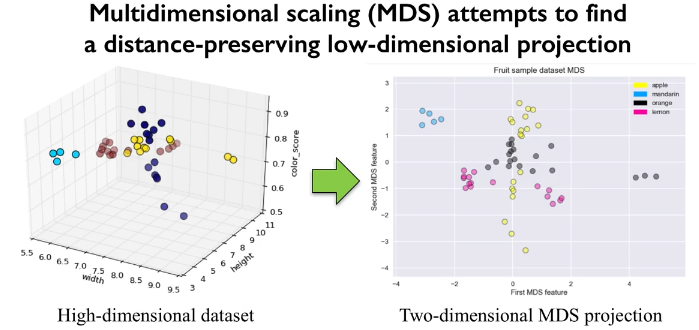


Using a technique like MDS and scikit learn is quite similar to using PCA. 
- Like with PCA, each feature should be normalized so its feature values have zero mean and unit variants. 
- After importing the MDS class from sklearn.manifold and 
- transforming the input data,
- you create the MDS object, specifying the number of components - typically set to two dimensions for visualization. 
- You then fit the object using the transform data, which will learn the mapping and then
- you can apply the MDS mapping to the _transformed_ data.

#### Multidimensional scaling (MDS) on the fruit dataset
 Here's an example of applying MDS to the fruit dataset. 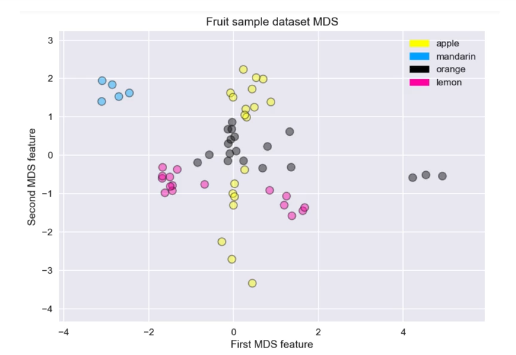
 
 And you can see it does a pretty good job of visualizing the fact that the different fruit types do indeed tend to cluster into groups. 
 

In [58]:
y_fruits.values.flatten()

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

<IPython.core.display.Javascript object>


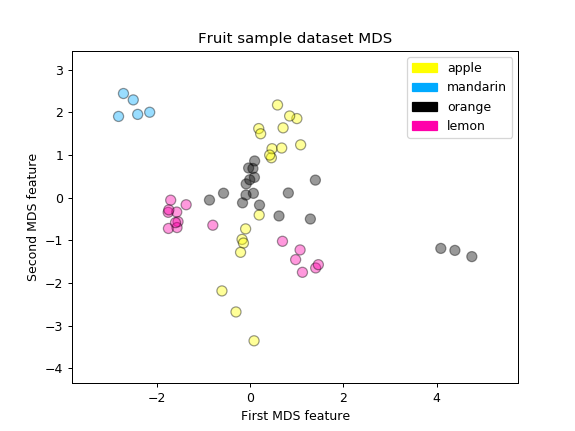

In [61]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits.values.flatten(), ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

<IPython.core.display.Javascript object>


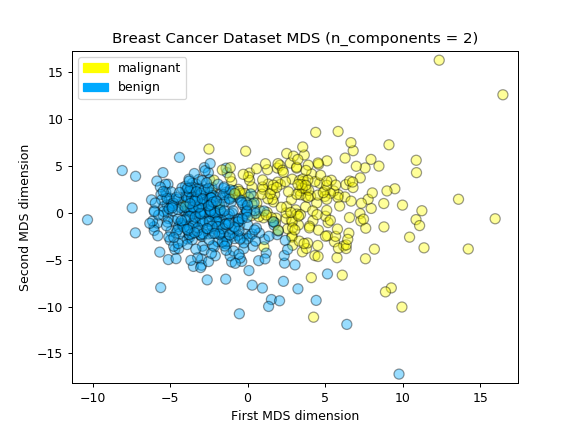

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE
An especially powerful manifold learning algorithm for visualizing your data is called __t-SNE__. 

t-SNE finds a two-dimensional representation of your data, such that the _distances_ between points in the 2D scatterplot <font color='red'> match as closely as possible </font> the _distances_ between the _same_ points in the original high dimensional dataset.

In particular, t-SNE gives much more weight to preserving information about distances between points that are _neighbors_. Here's an example of t-SNE applied to the images in the handwritten digits dataset. 

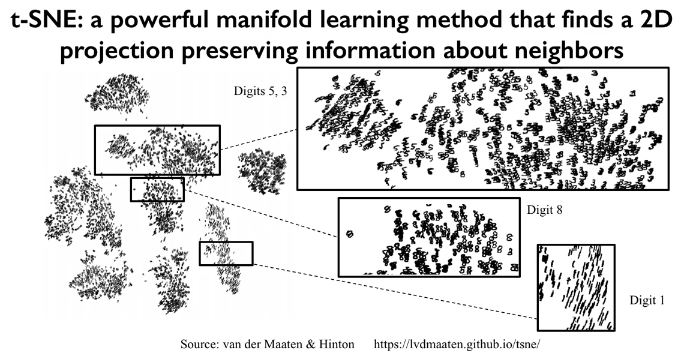

You can see that this two-dimensional plot __preserves the neighbor__ relationships between images that are similar in terms of their pixels. 

> For example, the cluster for most of the digit eight samples is closer to the cluster for the digits three and five, in which handwriting can appear more similar than to say the digit one, whose cluster is much farther away.

#### t-SNE on the fruit dataset

And here's an example of applying t-SNE on the fruit dataset. The code is very similar to applying MDS and essentially just replaces MDS with t-SNE.

The interesting thing here is that t-SNE does a _poor_ job of finding structure in this rather small and simple fruit dataset, which reminds us that we should __try__ at least a few different approaches when visualizing data using manifold learning to see which works best for a particular dataset. 

<font color='red'>t-SNE tends to work better on datasets that have more __well-defined local structure__; in other words, more clearly defined patterns of neighbors.</font>
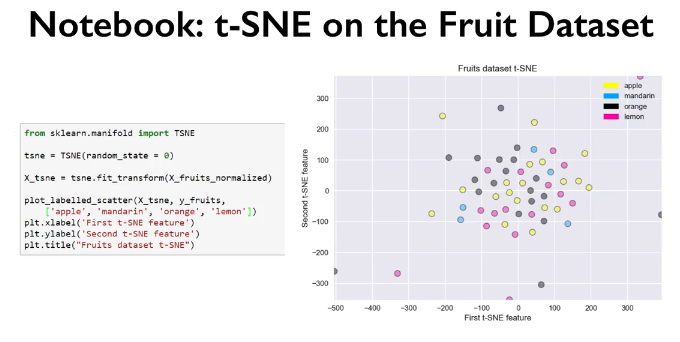

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.)


<IPython.core.display.Javascript object>


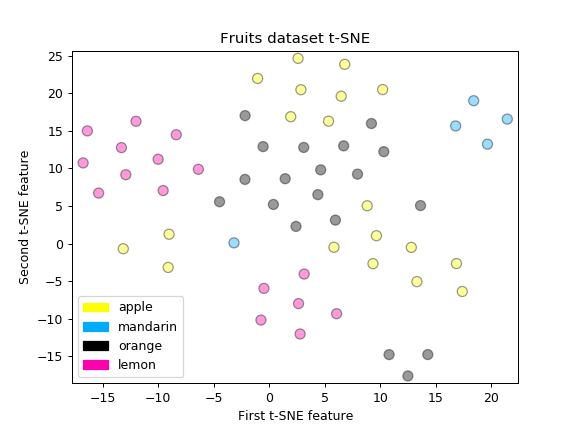

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

#plot_labelled_scatter(X_tsne, y_fruits, <- did not work
plot_labelled_scatter(X_tsne, y_fruits['fruit_label'], 
    class_labels=['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  

See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

<IPython.core.display.Javascript object>


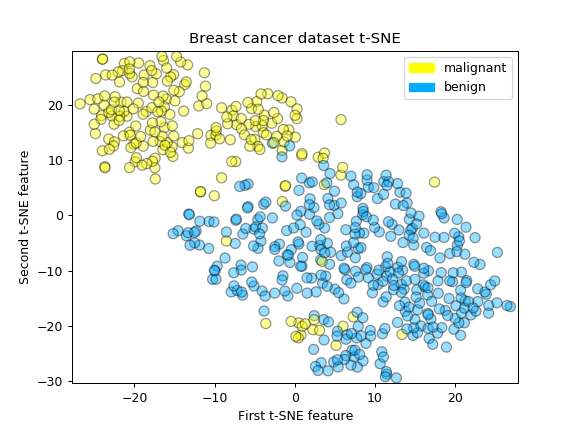

In [14]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

https://distill.pub/2016/misread-tsne

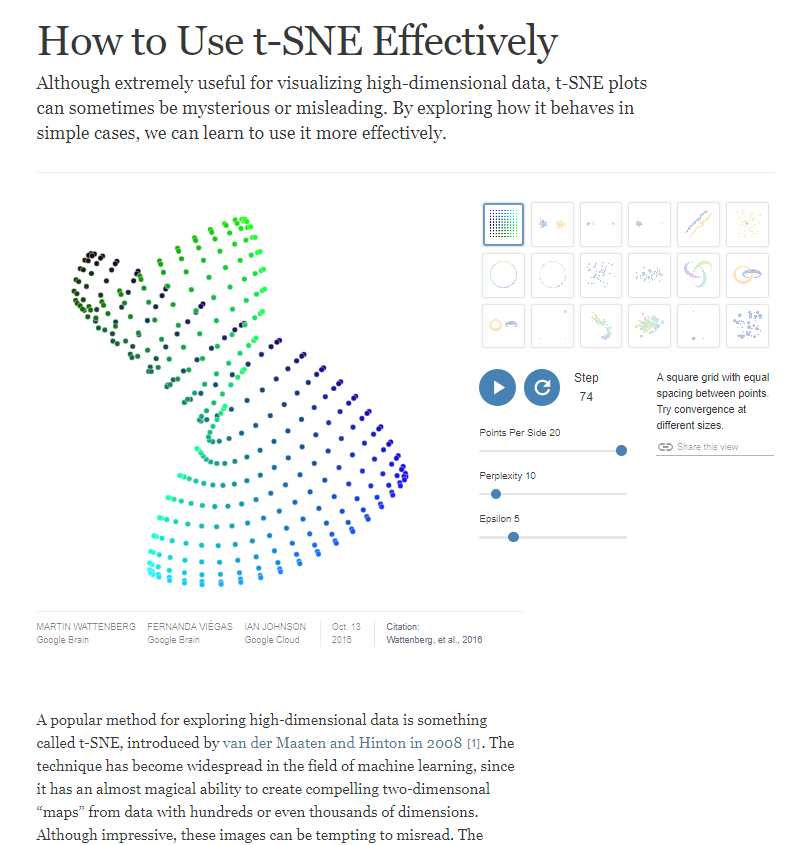

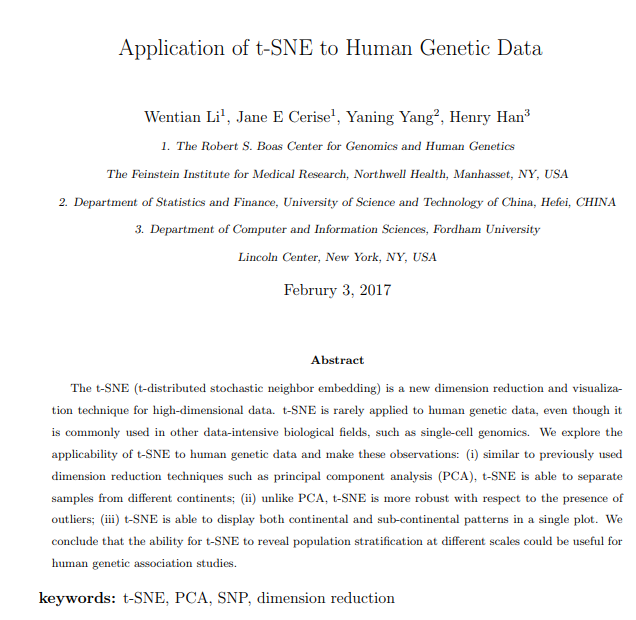

## Clustering

Aside from transformations, the other family of unsupervised learning methods are the clustering methods. The goal of clustering is to find a way to divide up a data set into groups called clusters so that groups with similar data instances are assigned to the same cluster, while very dissimilar objects are assigned to different clusters. 
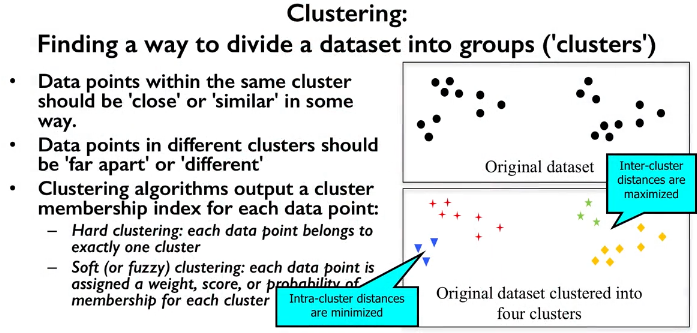

If new data points were being added over time, some clustering algorithms could also predict which cluster a new data instance should be assigned to, similar to classification, but _without_ being able to _train_ the clustering model using label examples in advanced.


### K-means

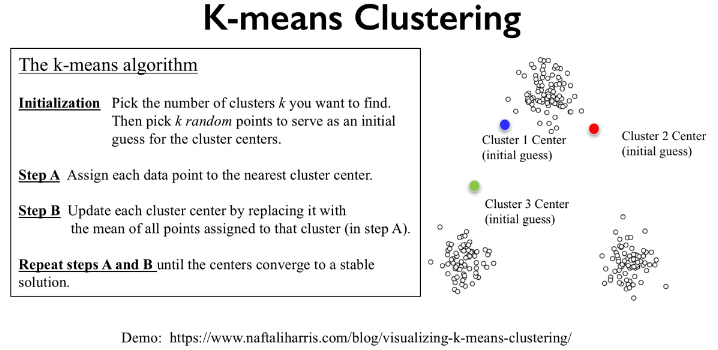

One of the most widely used clustering algorithms is called k-means clustering. 

K-means clustering __finds__ k cluster centers in different regions of the feature space that it thinks represent very different groups. 

You need to __specify__ the value of k ahead of time, which is one of the draw backs of k-means. For some problems, we may know the number of classes the data should fall into, but for many other tasks, we might not. 

K-means operates by 
- first randomly picking locations for the k-cluster centers.
- Then it goes back and forth between two steps. 
    - In the first step, given the locations of existing cluster centers, it assigns each data point to a cluster center based on its distance from the center. In other words, it _assigns_ each data point to the closest center. 
    - Then in the second step, it _adjusts_ the locations of each cluster center. It does this by setting the new cluster center to the mean of the positions of all the data points in that cluster. 
- Somewhat magically, after running this alternating process for a while, coherent clusters do start to form. And the cluster centers and the corresponding cluster assignment for each data point eventually settled down to something stable. 

Now one aspect of k means is that different random _starting points_ for the cluster centers often result in very _different_ clustering solutions. So typically,
- the k-means algorithm is run in scikit-learn with ten different random _initializations_.
- And the solution occurring the _most_ number of times is chosen.



Here is a __step by step__ example. 

1. We first _choose_ three locations in the space randomly to be the cluster centers. 
2. Then we _assign_ each data point to the cluster with the nearest center. 
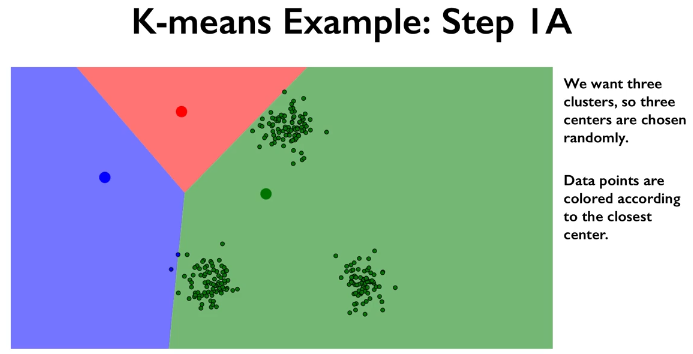


3. Now for each cluster (orange, blue, green), we compute the _mean location_ of all points in the cluster and use that as the new cluster center for the next iteration. 
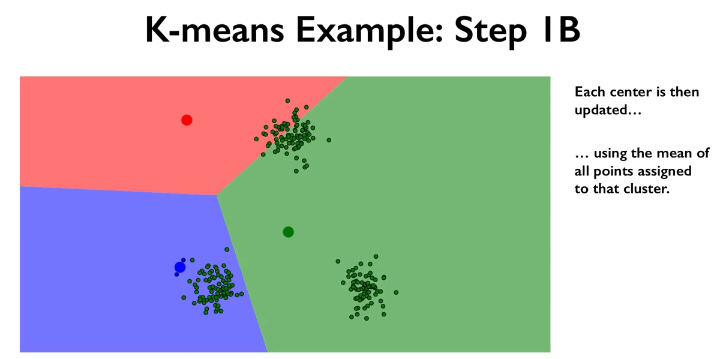


4. Here's the second iteration of the first and second steps. 
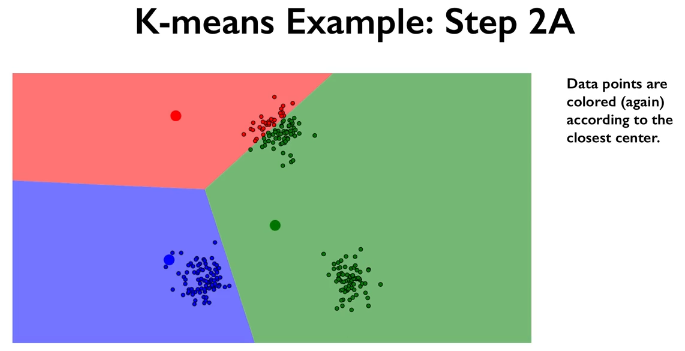

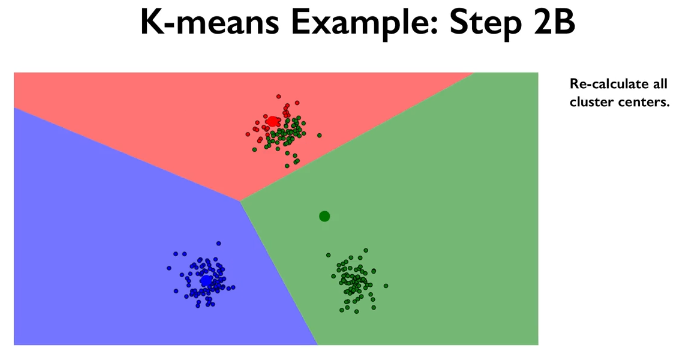

Eventually, after 20 or 50 or 100 steps, things settle down to converge on one solution, as shown here. 

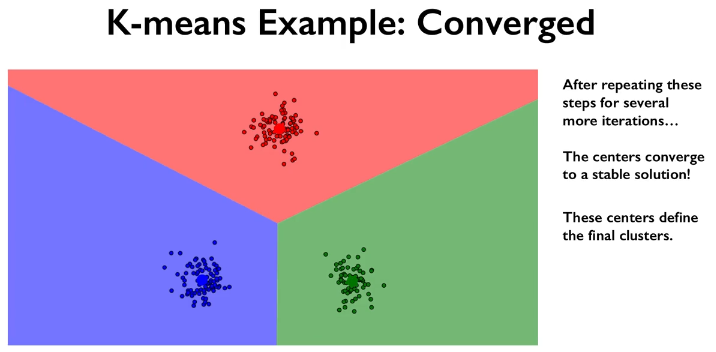

K-means clustering is simple to apply in scikit learning.
- You import the k-means class from __sklearn.cluster__ 
- create the k-means object 
- set into value of k by specifying the _n_cluster_ parameter, and then
- call the fit method on the dataset to run the algorithm. 
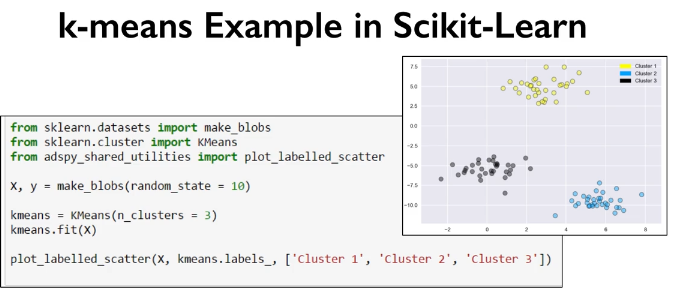

One distinction should be made here between clustering algorithms that can predict __which center__ _new_ data points should be assigned to, and those that _cannot_ make such predictions. 
- K-means __supports__ the predict method, and so we can call the fit and predict methods _separately_. 
- Later methods we'll look at like __agglomerative clustering__ do _not_ and must perform the fit and predict in a __single step__, as we'll see. 

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Here's the output from the notebook code showing the result supplied to the fruits dataset, where we know the value of k ahead of time. 

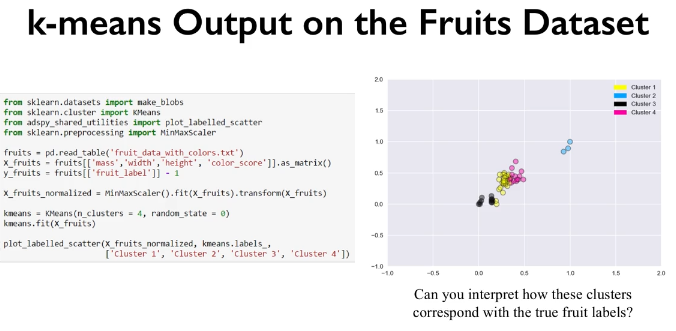

__Note typo__: kmeans.fit(X_fruits) should be kmeans.fit(X_fruits_normalized)

Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


<IPython.core.display.Javascript object>


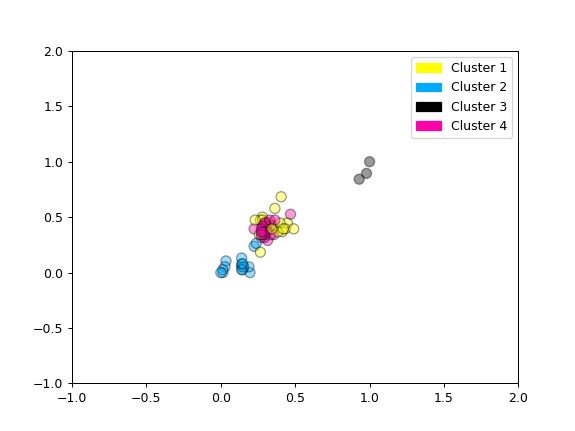

In [68]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
#kmeans.fit(X_fruits) #typo in original figure pasted above
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

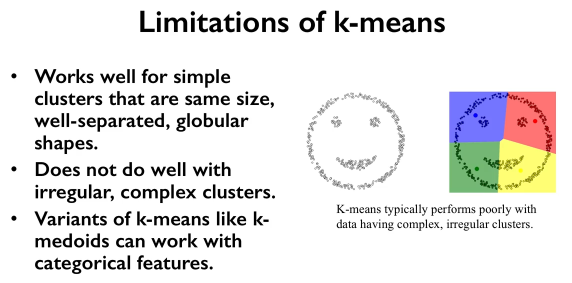

- Note that kmeans is _very_ sensitive to the range of future values, so if your data has features with very different ranges, it's important to _normalize_ using min-max scaling, as we did for some supervised learning methods. 
- Because each cluster in k-means clustering is defined entirely by its center point, it can only capture fairly _simple_ types of clusters.
- K-means clustering tends to work well when the data points form into groups of roughly the same size, with simple _globular_ shapes that are well-separated. 
- K-means will tend not to do well if the data forms long, irregular clusters, for example. 

Also the version k-means we saw here assumed that the data features were continuous values. However, in some cases we may have _categorical_ features, where taking the mean _doesn't_ make sense. In that case, there are variants of k-means that can use a more general definition of distance,such as the __k-medoids__ algorithm that can work with categorical features. 

### Agglomerative clustering

__Agglomerative clustering__ refers to a family of clustering methods that work by doing an iterative bottom up approach. 

1. First, each data point is put into its _own_ cluster of one item. 
2. Then, a sequence of clusterings are done where the most similar two clusters at each stage are _merged_ into a new cluster. 
3. Then, this process is repeated until some _stopping_ condition is met. 
    - In scikit-learn, the stopping condition is the number of clusters.
    
Here's a visual example of how agglomerative clustering might proceed on a sample dataset until three clusters are reached. 
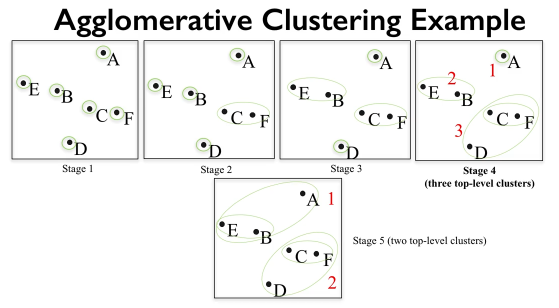

1. In Stage 1, each data point is in its own cluster, shown by the circles around the points. 
2. In Stage 2, the two most similar clusters, which at this stage amounts to defining the closest points are merged. 
3. And this process is continued, as denoted by the expanding and closed regions that denote each cluster. 

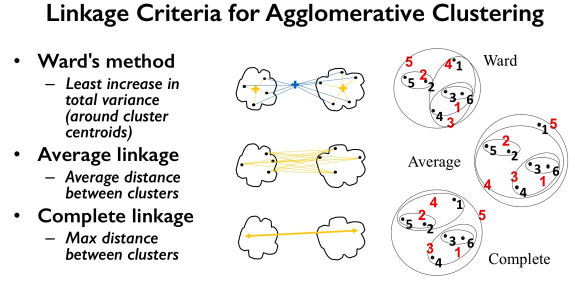

You can choose _how_ the agglomerative clustering algorithm determines the most similar cluster by specifying one of several possible linkage criteria. In scikit-learn, the following three linkage criteria are available, Ward, average, and complete. 

1. __Ward's method__ chooses to merge the two clusters that give the smallest increase in total variance within all clusters. 
2. __Average linkage__ merges the two clusters that have the smallest average distance between points. 
3. __Complete linkage__, which is also known as __maximum linkage__, merges the two clusters that have the smallest maximum distance between their points.

In general, Ward's method works well on _most_ data sets, and that's our usual method of choice. 

In some cases, if you expect the sizes of the clusters to be very different, for example, that one cluster is much _larger_ than the rest, it's worth trying average and complete linkage criteria as well. 

To perform agglomerative clustering in scikit-learn, you
- import the __AgglomerativeClustering class__ from sklearn.cluster.
- When initializing the object, you specify the __n_clusters__ parameter that causes the algorithm to _stop_ when it has reach that number of clusters. 
- You call the __fit_predict__ method using the data set as input and they return the set of cluster assignments for the data points as shown here. 

<IPython.core.display.Javascript object>


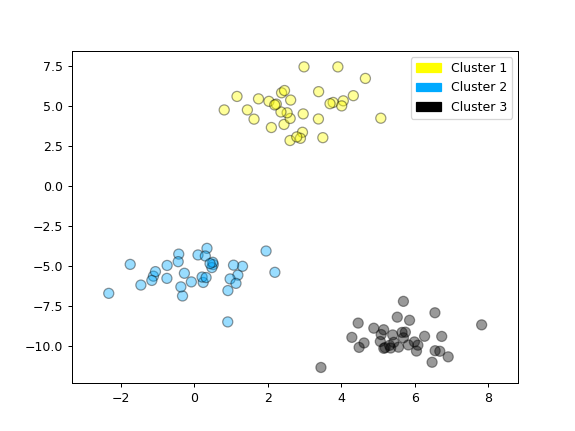

In [69]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creating a dendrogram (using scipy)

One of the nice things about agglomerative clustering is that it automatically arranges the data into a _hierarchy_ as an effect of the algorithm, reflecting the _order_ and _cluster distance_ at which each data point is assigned to successive clusters. 

This hierarchy can be useful to visualize using what's called a __dendrogram__, which can be used _even_ with higher dimensional data. 

Here's the dendogram corresponding to the Ward's method clustering of the previous data set example. 
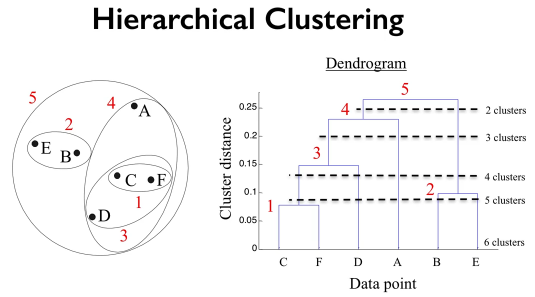

- The data points are at the bottom and are numbered. 
- The y axis represents _cluster distance_, namely, the distance that two clusters are apart in the data space. 
- The data points form the leaves of the tree at the bottom, and
- the new node parent in the tree is _added_ as each pair of successive clusters is merged.
- The height of the node parent along the y axis captures how far _apart_ the two clusters were when they merged, with the branch going up representing the _new_ merged cluster. 

Note that you can tell how far apart the merged clusters are by the _length_ of each branch of the tree. This property of a dendogram can help us figure out the _right_ number of clusters.

In general, we want clusters that have highly similar items _within_ each cluster, but that are far apart from _other_ clusters. 

> For example, we can see that going from _three_ clusters to _two_ happens at a fairly _high_ Y value. Which means the clusters that were merged were a significant distance apart. We might want to avoid choosing two clusters and stick with three clusters that don't involve forcing a merge for clusters that have very dissimilar items in them. 

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


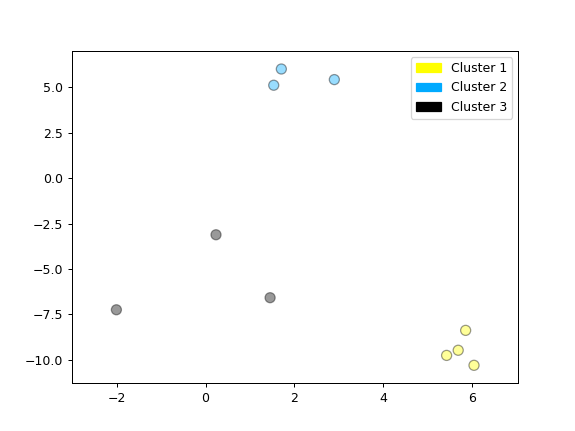

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [70]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

Scikit-learn _doesn't_ provide the ability to plot dendrograms, but __SciPy__ does. 

SciPy handles clustering a little differently than scikit-learn, but here is an example.

- We first import the dendrogram in ward functions from the scipy.cluster hierarchy module. 
- The ward function returns an array that specifies the distances spanned during the agglomerative clustering. 
- This ward function returns a _linkage array_, which can then be passed to the dendogram function to plot the tree. 

Typically, making use of this hierarchy is most useful when the underlying data itself follows some kind of hierarchical process so the tree is easily interpreted.

> For example, hierarchical clustering is especially useful for <font color=red> __genetic and other biological data__ </font> where the levels represent stages of mutation or evolution. 

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


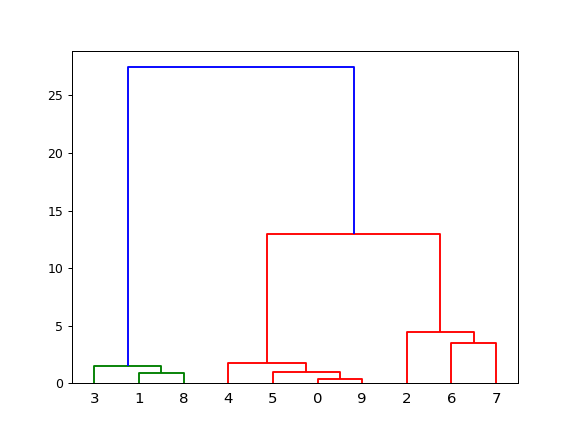

In [71]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN clustering

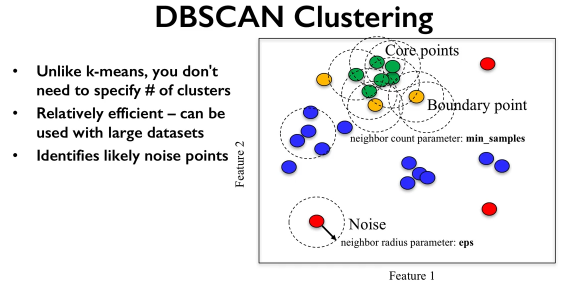

But there are other data sets where both k-means clustering and agglomerative clustering don't perform well. 

So we're now going to give an overview of a _third_ clustering method called DBSCAN. DBSCAN is an acronym that stands for __density-based spatial clustering of applications with noise__. 

- One advantage of DBSCAN is that you _don't need to specify_ the number of clusters in advance. 
- Another advantage is that it works well with datasets that have more _complex_ cluster shapes. 
- It can also find points that are_outliers that _shouldn't reasonably be assigned_ to any cluster.
- DBSCAN is relatively _efficient_ and can be used for large datasets. 

The main idea behind DBSCAN is that
- clusters represent areas in the dataspace that are more __dense__ with data points, while being
- separated by regions that are __empty__ or at least much less densely populated.

The two main parameters for DBSCAN are __min samples__ and  __eps__.

- _All_ points that lie in a more dense region are called _core samples_.
- For a given data point, if there are _min sample_ of other data points that lie within a distance of _eps_, that given data points is labeled as a _core sample_. 
- Then, all core samples that are with a distance of eps units apart are put into the _same_ cluster. 
- In addition to points being categorized as core samples, points that don't end up belonging to any cluster are considered as _noise_. 
- While points that are within a distance of eps units from core points, but not core points themselves, are termed _boundary points_. 

Here's an example of DBSCAN applied to a sample data set. 

As with the other clustering methods, DBSCAN is imported from the sklearn.cluster module. And just like with a agglomerative clustering, DBSCAN doesn't make cluster assignments from new data. 

So we use the fit predict method to cluster and get the cluster assignments back in one step.

One consequence of not having the right settings of eps and min samples for your particular dataset might be that the cluster memberships returned by DBSCAN may all be assigned the label -1, which indicates noise.

Basically, the EPS setting does implicitly control the _number_ of clusters that are found. With DBSCAN, if you've scaled your data using a standard scalar or min-max scalar to make sure the feature values have comparable ranges, finding an appropriate value for eps is a bit easier to do. 

One final note, make sure that when you use the cluster assignments from DBSCAN, you check for and handle the -1 noise value appropriately. Since this negative value might cause problems, for example, if the cluster assignment is used as an index into another array later on. 


Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


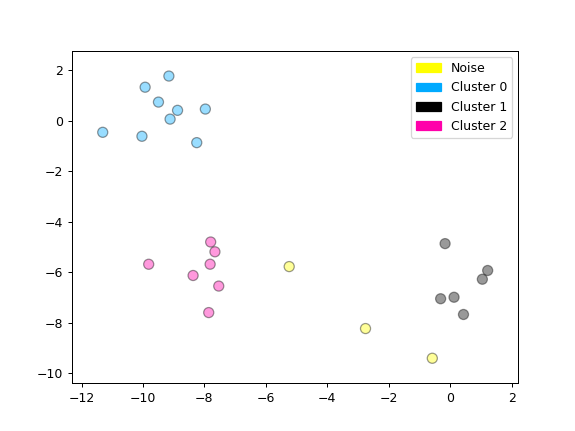

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

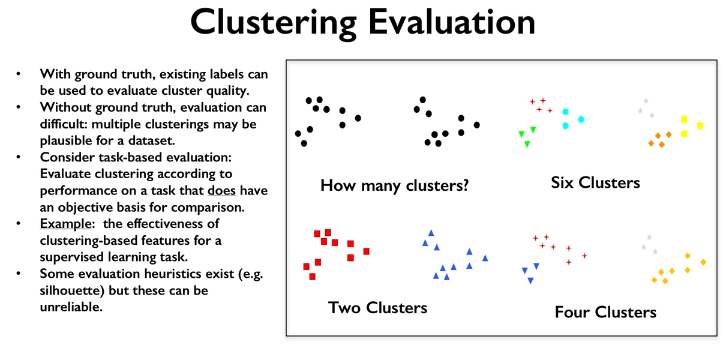

Unlike supervised learning, where we have existing labels or target values to use for evaluating the effectiveness of the learning method, it can be _difficult_ to evaluate unsupervised learning algorithms automatically, since there's typically __no ground truth__ to compare against.

In some cases, as in the __breast cancer__ example, we may have existing labels that can be used to evaluate the quality of the clusters by comparing the assignment of a data point to a cluster with the label assigned to the same data point. But there are many cases where labels are not available. 

In addition, in the case of clustering, for example, there's ambiguity, in a sense that there are typically multiple clusterings that could be plausibly assigned to a given data set. And none of them is obviously better than another unless we have some additional criteria, such as, performance on the specific application task that does have an objective evaluation to use as a basis for comparison. 

> For example, in cases where the results of the clustering are used as features for supervised learning, we could use the overall classifier _accuracy gain_ from adding these clustering-based features as a measure of success for the underlying clustering. 

Another issue with evaluating clustering algorithms is that it can be hard to automatically interpret or label the meaning of the clusters that are found. 

And this is still a step that requires human expertise to judge.